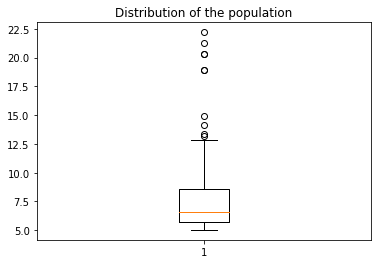

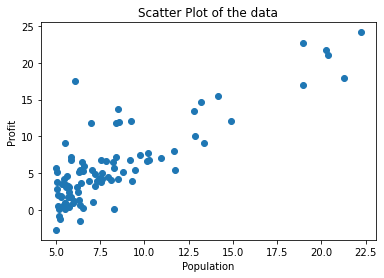

100%|██████████| 15000/15000 [00:18<00:00, 793.13it/s]


Training set :
Scikit Learn Regressor :
Mean squared error: 9.678742639794898
Coefficient of determination: 0.7349112895799825
Our Regressor :
Mean squared error: 9.67874263979519
Coefficient of determination: 0.7349112895799744
----------------------------------------------------------------
Test set :
Scikit Learn Regressor results:
Mean squared error: 7.9834814649265065
Coefficient of determination: 0.5881478638570257
Our Regressor results:
Mean squared error: 7.983481469209192
Coefficient of determination: 0.5881478636360904


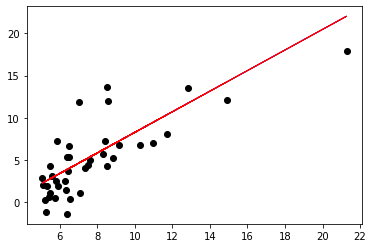

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sns
from linear_regression import *


#read_file = pd.read_csv (r'Files/ex1data1.txt', header = None)
#read_file.columns = ['population','profit']
#read_file.to_csv (r'data.csv', index=None)


data = pd.read_csv('data/data.csv')

plt.boxplot(data['population'])
plt.title('Distribution of the population')
plt.show()


plt.scatter(data['population'],data['profit'])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Scatter Plot of the data')
plt.show()




stratify = False

if stratify:

    data['decile'] = pd.qcut(data['population'], 5, labels=np.arange(5, 0, -1))
    data['decile2'] = pd.qcut(data['profit'], 5, labels=np.arange(5, 0, -1))

#plt.scatter(data['population'],data['profit'])
#plt.show()

#sns.distplot(data['population'])



    indexNames = data[(data['profit'] >= 10) & (data['population'] <= 10)].index
    data.drop(indexNames , inplace=True)


    X_train, X_test, Y_train, Y_test = train_test_split(data['population'], data['profit'], test_size=0.4, random_state=0,stratify=data['decile2'])

else:
    
    X_train, X_test, Y_train, Y_test = train_test_split(data['population'], data['profit'], test_size=0.4, random_state=0)


X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)




Regression_scikit = LinearRegression()

Regression = Linear_Regression(0.01)



Regression_scikit.fit(X_train,Y_train)

Regression.fit(X_train,Y_train,nb_epochs=15_000)




print('Training set :')

print('Scikit Learn Regressor :')
print('Mean squared error:',mean_squared_error(Y_train, X_train*Regression_scikit.coef_+Regression_scikit.intercept_))
print('Coefficient of determination:',r2_score(Y_train, X_train*Regression_scikit.coef_+Regression_scikit.intercept_))


print('Our Regressor :')
print('Mean squared error:',mean_squared_error(Y_train, X_train*Regression.theta[1]+Regression.theta[0]))
print('Coefficient of determination:',r2_score(Y_train, X_train*Regression.theta[1]+Regression.theta[0]))

print('----------------------------------------------------------------')
print('Test set :')

Y_pred_scikit = Regression_scikit.predict(X_test)
Y_pred = Regression.predict(X_test)



print('Scikit Learn Regressor results:')
print('Mean squared error:',mean_squared_error(Y_test, Y_pred_scikit))
print('Coefficient of determination:',r2_score(Y_test, Y_pred_scikit))


print('Our Regressor results:')
print('Mean squared error:',mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination:',r2_score(Y_test, Y_pred))


plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=1)
plt.plot(X_test, Y_pred_scikit, color='red', linewidth=1)

plt.show()

In [23]:
theta_0, theta_1, J_values = Regression.contour_map(X_train, Y_train)

100%|██████████| 100/100 [00:02<00:00, 37.20it/s]


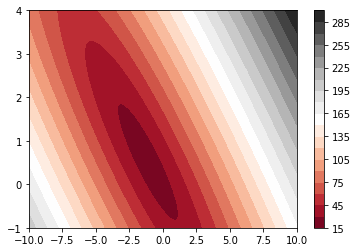

In [24]:
plt.contourf(theta_0, theta_1, J_values, 20, cmap='RdGy');
plt.colorbar();

In [25]:
print('Parameter 0 :',Regression.theta[0])
print('Parameter 1 :',Regression.theta[1])

Parameter 0 : -3.9492945404903805
Parameter 1 : 1.2212949735614427


In [26]:
print('Parameter 0 :',Regression_scikit.intercept_)
print('Parameter 1 :',Regression_scikit.coef_[0])

Parameter 0 : -3.949295748980134
Parameter 1 : 1.2212950879192126


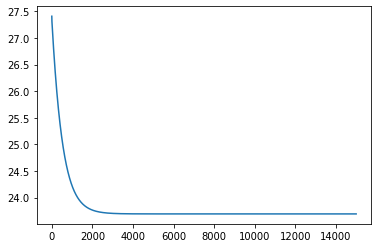

In [29]:
plt.plot(Regression.history_loss[6:])